### TFIDF, CountVectorizer with NaiveBayes, SVC, KNN
### GUI using tkinter

In [157]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from surprise import Dataset
from surprise import accuracy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
import nltk
from nltk.corpus import stopwords 
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
import random
import string
import bs4 as bs
import urllib.request
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import random
from tensorflow.keras.optimizers import SGD
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer


In [158]:
import warnings
warnings.filterwarnings('ignore')

# Part-1

## 1. Import Data

In [159]:
mainDf = pd.read_csv('data.csv')



In [160]:
# to display the shape and the top 5 rows of the dataframes
print(mainDf.shape)
mainDf.head()

(425, 11)


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [161]:
mainDf.head()


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [162]:
mainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
Unnamed: 0                  425 non-null int64
Data                        425 non-null object
Countries                   425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Genre                       425 non-null object
Employee or Third Party     425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


## 2. Data Cleansing, Data analysis & visualisation



In [163]:
# checking for missing values
mainDf.isnull().sum().any()


False

In [164]:
#Hence there are no null values in the dataset


In [165]:
dupes = mainDf.duplicated()
sum(dupes)


0

In [166]:
mainDf.shape

(425, 11)

In [167]:
Description_words = ''
CriticalRisk_words= ''
stopwords = set(STOPWORDS)

for val in mainDf.Description:
    val = str(val)
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    Description_words += " ".join(tokens)+" "
 
for val in mainDf["Critical Risk"]:
    val = str(val)
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    CriticalRisk_words += " ".join(tokens)+" "

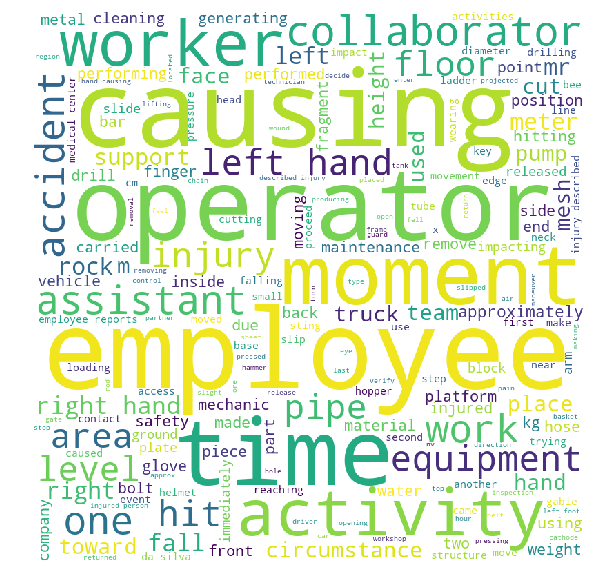

In [168]:
wordcloud_Description = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(Description_words)
     
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_Description)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

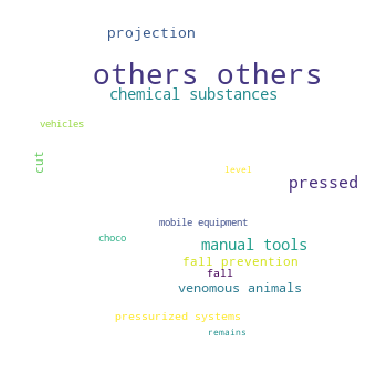

In [169]:

wordcloud_CriticalRisk = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 8).generate(CriticalRisk_words)
     
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud_CriticalRisk)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [179]:
CR=mainDf["Critical Risk"]
CR_Others = CR[CR=='Others']

CR_NoOthers = CR[CR!='Others']
print(CR.shape)
print(CR_Others.shape)
print(CR_NoOthers.shape)

(425,)
(232,)
(193,)


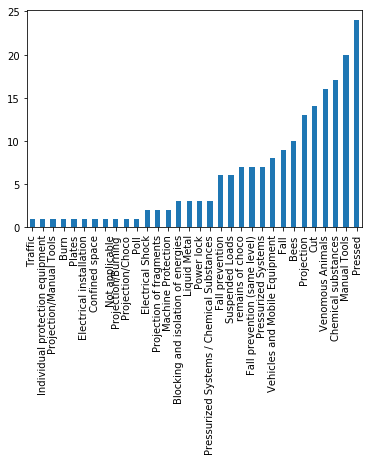

In [193]:
words = Counter(CR_NoOthers)

df = pd.DataFrame.from_dict(words, orient='index')
df = df.rename(columns={df.columns[0]: 'Count'})

df=df.sort_values("Count")

df["Count"].plot(kind='bar')


In [181]:
print(words.most_common(10))

[('Pressed', 24), ('Manual Tools', 20), ('Chemical substances', 17), ('Venomous Animals', 16), ('Cut', 14), ('Projection', 13), ('Bees', 10), ('Fall', 9), ('Vehicles and Mobile Equipment', 8), ('Pressurized Systems', 7)]


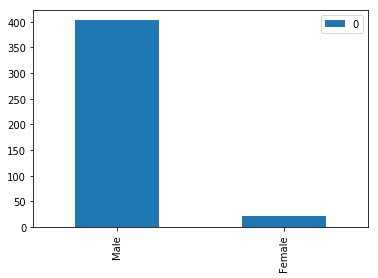

In [19]:
Genre = Counter(mainDf["Genre"])
df = pd.DataFrame.from_dict(Genre, orient='index')
df.plot(kind='bar')

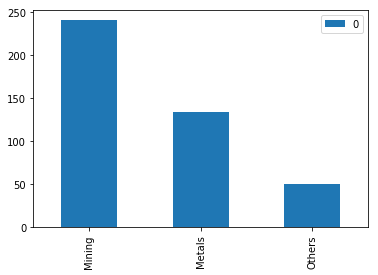

In [20]:
industry = Counter(mainDf["Industry Sector"])
df = pd.DataFrame.from_dict(industry, orient='index')
df.plot(kind='bar')

##### Lets create a function to clean the data by removing special characters, spaces and turning them into lower case

In [21]:
#Here we remove backslash & apostrophe;remove everything except alphabets a-z;
#remove all the whitespaces;convert the provided text to lowercase

def cleaner(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower()     
    return text

##### Lets now pass all the texts to our cleaner function

In [22]:
mainDf['Cleaned_Description']=mainDf['Description'].apply(lambda x: cleaner(x))


In [23]:
mainDf.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Cleaned_Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,while removing the drill rod of the jumbo for ...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,during the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,in the sub station milpo located at level when...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,being am approximately in the nv cx ob the per...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,approximately at a m in circumstances that the...


In [24]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))


In [25]:
def stopwords_remover(text):
    no_stops = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stops)

In [80]:
mainDf['Cleaned_Description'] = mainDf['Cleaned_Description'].apply(lambda x: stopwords_remover(x))

In [81]:
mainDf.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Cleaned_Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo maintenance superviso...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,sub station milpo located level collaborator e...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,approximately nv cx ob personnel begins task u...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,approximately circumstances mechanics anthony ...


In [82]:
imp_df=mainDf.drop(['Unnamed: 0','Data','Countries','Local','Industry Sector','Potential Accident Level','Critical Risk','Genre','Employee or Third Party','Description'],axis=1)


In [83]:
imp_df.head()

,Accident Level,Cleaned_Description
0,I,removing drill rod jumbo maintenance superviso...
1,I,activation sodium sulphide pump piping uncoupl...
2,I,sub station milpo located level collaborator e...
3,I,approximately nv cx ob personnel begins task u...
4,IV,approximately circumstances mechanics anthony ...


In [111]:
Accident_Level_Map = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'   :   6
}
Accident_Level_Map_reverse = {
    1   :   'I',
    2 :   'II',
    3 :   'III',
    4 :   'IV',
    5   :   'V',
    6   :   'VI'
}

In [85]:
imp_df['Accident_Level'] = imp_df['Accident Level'].map(Accident_Level_Map)


In [86]:
imp_df.head()

,Accident Level,Cleaned_Description,Accident_Level
0,I,removing drill rod jumbo maintenance superviso...,1
1,I,activation sodium sulphide pump piping uncoupl...,1
2,I,sub station milpo located level collaborator e...,1
3,I,approximately nv cx ob personnel begins task u...,1
4,IV,approximately circumstances mechanics anthony ...,4


In [87]:
X = imp_df.Cleaned_Description
y = imp_df['Accident_Level']
#y = mainDf['Critical Risk']

In [88]:
#X = imp_df.Cleaned_Description
#y = imp_df['Critical Risk']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [91]:
tf_vectorizer = TfidfVectorizer() 
cv_vectorizer = CountVectorizer() 


In [92]:
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_train_cv = cv_vectorizer.fit_transform(X_train)


In [93]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape)


n_samples: 340, n_features: 2682


In [94]:
X_test_tf = tf_vectorizer.transform(X_test)

X_test_cv = cv_vectorizer.transform(X_test)


In [95]:

print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 85, n_features: 2682


In [96]:

naive_bayes_classifier_tf = MultinomialNB()
naive_bayes_classifier_cv = MultinomialNB()
naive_bayes_classifier_tf.fit(X_train_tf, y_train)
naive_bayes_classifier_cv.fit(X_train_cv, y_train)

MultinomialNB()

In [97]:
y_pred_tf = naive_bayes_classifier_tf.predict(X_test_tf)
y_pred_cv = naive_bayes_classifier_cv.predict(X_test_cv)



# computing the accuracins of tf and cv
score_tf = metrics.accuracy_score(y_test, y_pred_tf)
score_cv = metrics.accuracy_score(y_test, y_pred_cv)
print("tf_vectorizer with naive_bayes accuracy:   %0.3f" % score_tf)
print("cv_vectorizer with naive_bayes accuracy:   %0.3f" % score_cv)




tf_vectorizer with naive_bayes accuracy:   0.800
cv_vectorizer with naive_bayes accuracy:   0.765


In [197]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [198]:
SVC_tf = SVC()
SVC_cv = SVC()


In [199]:
SVC_tf.fit(X_train_tf, y_train)
SVC_cv.fit(X_train_cv, y_train)

SVC()

In [200]:
y_pred_tf_SVC = SVC_tf.predict(X_test_tf)
y_pred_cv_SVC = SVC_cv.predict(X_test_cv)



# computing the accuracies of tf and cv
score_tf_SVC = metrics.accuracy_score(y_test, y_pred_tf_SVC)
score_cv_SVC = metrics.accuracy_score(y_test, y_pred_cv_SVC)
print("tf_vectorizer with SVC accuracy:   %0.3f" % score_tf_SVC)
print("cv_vectorizer with SVC accuracy:   %0.3f" % score_cv_SVC)


tf_vectorizer with SVC accuracy:   0.800
cv_vectorizer with SVC accuracy:   0.788


In [102]:
KNeighborsClassifier_tf = KNeighborsClassifier()
KNeighborsClassifier_cv = KNeighborsClassifier()


In [103]:
KNeighborsClassifier_tf.fit(X_train_tf, y_train)
KNeighborsClassifier_cv.fit(X_train_cv, y_train)

KNeighborsClassifier()

In [104]:
y_pred_tf_knn = KNeighborsClassifier_tf.predict(X_test_tf)
y_pred_cv_knn = KNeighborsClassifier_cv.predict(X_test_cv)



# computing the accuracins of tf and cv
score_tf_knn = metrics.accuracy_score(y_test, y_pred_tf_knn)
score_cv_knn = metrics.accuracy_score(y_test, y_pred_cv_knn)
print("tf_vectorizer with KNeighborsClassifier accuracy:   %0.3f" % score_tf_knn)
print("cv_vectorizer with KNeighborsClassifier accuracy:   %0.3f" % score_cv_knn)


tf_vectorizer with KNeighborsClassifier accuracy:   0.788
cv_vectorizer with KNeighborsClassifier accuracy:   0.800


In [202]:
from tkinter import *
gui = Tk()
gui.title("Accident Chatbot ACB")


def predict(b):
    b=[b]
    desc_tf = tf_vectorizer.transform(b)
    a = naive_bayes_classifier_tf.predict(desc_tf)
    return a
    
    

def send():
    send = "\nYou -> "+e.get()+'\n'
    txt.insert(END, " "+send)
    user = e.get().lower()
    prediction=predict(user)[0]
    if prediction==1:
        pred='I'
    elif prediction==2:
        pred='II'
    elif prediction==3:
        pred='III'
    elif prediction==4:
        pred='IV'
    elif prediction==5:
        pred='V'
    elif prediction==6:
        pred='VI'
            
    

    txt.insert(END,  "ACB -> The accident is of level: "+ pred+"\n")
    e.delete(0, END)


txt = Text(gui)
txt.insert(END,  "                   Hi! Welcome to the accident report portal."+"\n\n" +"My name is Accident Chatbot ACB."+"\n" + "Please describe the accident in the below box:-\n")

txt.grid(row=0, column=0,columnspan=2)
e = Entry(gui, width=100)
e.grid(row=2, column=0)
send = Button(gui, text="Send", command=send).grid(row=2, column=1)
gui.mainloop()